In [1]:
from idm import IDM, IDMParameters
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [12]:
model = IDM()
model.set(IDMParameters(t_max=1000.0, L=1000))
model.integrate()

20.0
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 220. 240. 260.
 280. 300. 320. 340. 360. 380. 400. 420. 440. 460. 480. 500. 520. 540.
 560. 580. 600. 620. 640. 660. 680. 700. 720. 740. 760. 780. 800. 820.
 840. 860. 880. 900. 920. 940. 960. 980.]


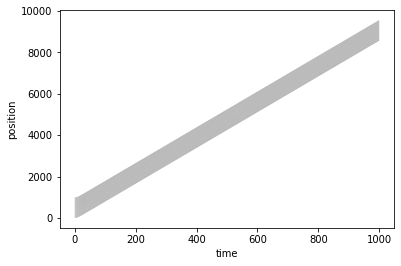

In [14]:
jump_car = 1 # The bigger, the less cars we see on the graph

x = model.x
time = model.time

start, end = None, None # start and end limits (to zoom)
for j in np.arange(0, model.N, jump_car):
    r = x[j,start:end]
    plt.plot(time[start:end], r, lw=0.1, c="k")
plt.xlabel("time")
plt.ylabel("position")
plt.show()